# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [54]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.12629827 2.72377654 2.77210534 2.25946234 2.7126727  2.40277224
 2.47742394 2.74831678 2.27474107 2.58315151]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [55]:
# your code here
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

def distribution (z, y, i):
    x = uniform.rvs(size=i)
    a = z
    b = y
    randoms  = a + (b-a)*x
    return(randoms)
    


How are the two distributions different?

In [56]:
# your answer here:
fun_1 = distribution(10, 15, 100)

fun_2 = distribution(10, 60, 1000)

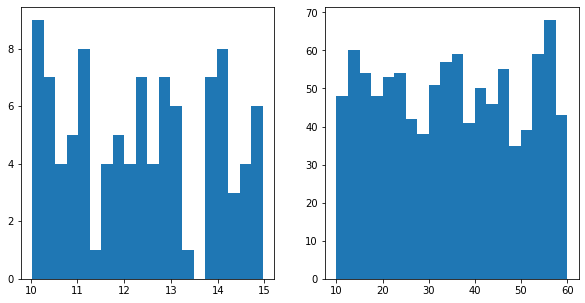

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(fun_1, 20)
axs[1].hist(fun_2, 20)

plt.show()








## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

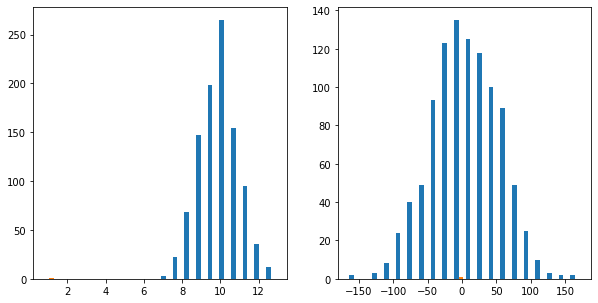

In [66]:
def normal (m, v, s):
    x = np.random.normal(m,v,s)
    y = norm.rvs()
    return(x, y) 

fun_3 = normal(10, 1, 1000)
fun_4 = normal(10, 50, 1000)

# plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(fun_3, 20)
axs[1].hist(fun_4, 20)

plt.show()

How are the two distributions different?

The 1 fig has more values on a small scale ~(6-12) and on the right the values are between ~(-150-150)


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

(array([8.1000e+01, 3.7400e+02, 6.7650e+03, 1.7039e+04, 8.9660e+03,
        2.0960e+03, 5.6900e+02, 3.6000e+01, 2.1000e+01, 5.0000e+00]),
 array([ 0.06      ,  4.76271429,  9.46542857, 14.16814286, 18.87085714,
        23.57357143, 28.27628571, 32.979     , 37.68171429, 42.38442857,
        47.08714286]),
 <a list of 10 Patch objects>)

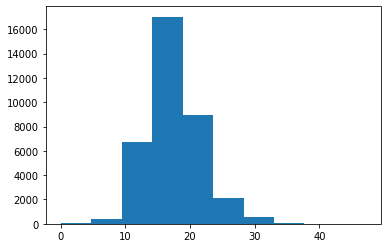

In [72]:
# your code here
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")

plt.hist(vehicles["Fuel Barrels/Year"])

2. CO2 Emission Grams/Mile 

(array([3.4000e+01, 8.3200e+02, 1.0205e+04, 1.5411e+04, 6.8250e+03,
        2.0100e+03, 5.7300e+02, 3.6000e+01, 2.1000e+01, 5.0000e+00]),
 array([  37.        ,  160.25714286,  283.51428571,  406.77142857,
         530.02857143,  653.28571429,  776.54285714,  899.8       ,
        1023.05714286, 1146.31428571, 1269.57142857]),
 <a list of 10 Patch objects>)

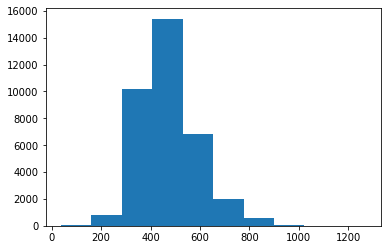

In [73]:
# your code here
plt.hist(vehicles["CO2 Emission Grams/Mile"])

3. Combined MPG

(array([6.3800e+02, 8.4990e+03, 1.5512e+04, 7.9320e+03, 2.4160e+03,
        6.3600e+02, 2.1000e+02, 6.5000e+01, 3.3000e+01, 1.1000e+01]),
 array([ 7. , 11.9, 16.8, 21.7, 26.6, 31.5, 36.4, 41.3, 46.2, 51.1, 56. ]),
 <a list of 10 Patch objects>)

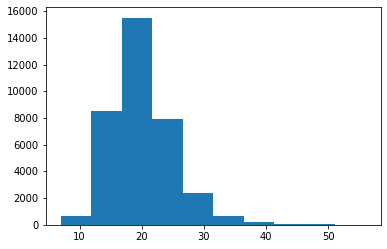

In [74]:
# your code here
plt.hist(vehicles["Combined MPG"])

Which one(s) of the variables are nearly normally distributed? How do you know?

### you answer here:
All the data was a similar distribution to the normal curve so it's nearly normally distributed.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

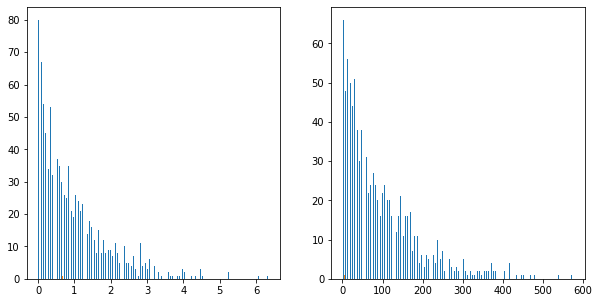

In [81]:
# your code here
from scipy.stats import expon
def exp (s, size):
    x = np.random.exponential(s, size)
    y = expon.rvs()
    return x, y

fun_5 = exp(1, 1000)
fun_6 = exp(100, 1000)

# plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(fun_5, 100)
axs[1].hist(fun_6, 100)

plt.show()

How are the two distributions different?

### your answer here:
although the shape is similar the values are more disperse on the right fig.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

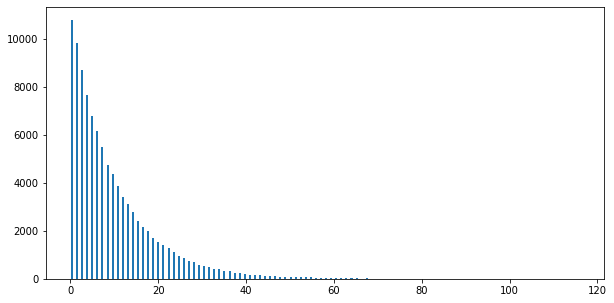

(0.5978370007556204, 0.7985076962177717)

In [98]:
# your answer here
# Hint: This is same as saying P(x<15)
fun_7 = exp(10, 100000)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.hist(fun_7, 100)


plt.show()

x = expon.interval((1/10))
x



What is the probability that the customer will spend more than 15 minutes

In [99]:
# your answer here
y = expon.interval((9/10))
y

(0.05129329438755052, 2.99573227355399)